# Data Cleaning

Impoting Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings,re
warnings.filterwarnings('ignore')
import statistics as stat
import seaborn as sns

# Data Overview

In [41]:
data =pd.read_csv('googleplaystore.csv')
data.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4912,TOSHIBA Smart AC,TOOLS,2.6,60,18M,"10,000+",Free,0,Everyone,Tools,"August 4, 2018",2.1.20180804_01,4.0.3 and up
1021,"PTI Flex Maker, Photo Frame Editor & Songs 2018",EVENTS,4.6,99,13M,"10,000+",Free,0,Everyone,Events,"July 6, 2018",1.1,4.2 and up
5740,Analog Clock AW Plus-7,TOOLS,4.2,725,3.0M,"100,000+",Free,0,Everyone,Tools,"March 14, 2018",2.0,4.3 and up
772,"play2prep: ACT, SAT prep",EDUCATION,4.2,3692,4.4M,"100,000+",Free,0,Everyone,Education,"July 23, 2015",4.1.3,2.3.3 and up
8303,Love Collage - Photo Editor,PHOTOGRAPHY,4.3,251686,31M,"10,000,000+",Free,0,Everyone,Photography,"July 28, 2017",2.3.8.6,4.1 and up
3809,The Wall Street Journal: Business & Market News,NEWS_AND_MAGAZINES,4.1,40975,36M,"1,000,000+",Free,0,Everyone 10+,News & Magazines,"August 2, 2018",4.4.2.19,4.1 and up
3049,US Open Tennis Championships 2018,SPORTS,4.0,9971,33M,"1,000,000+",Free,0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up
6817,BU Dental GoGoldman,TRAVEL_AND_LOCAL,NaN,0,18M,100+,Free,0,Everyone,Travel & Local,"September 1, 2017",1.2,4.4 and up
2051,Piano Kids - Music & Songs,FAMILY,4.6,46741,50M,"10,000,000+",Free,0,Everyone,Music;Music & Video,"August 3, 2018",1.73,4.0.3 and up
3550,Microsoft OneNote,PRODUCTIVITY,4.4,480638,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"July 22, 2018",16.0.10325.20024,4.4 and up


In [42]:
data.shape

(10841, 13)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [44]:
data.describe(include='O')

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


# Deduntions

Twelve features have their dtypes to be object, including Price and Reviews 😞, while Rating is float.

There is a number of features with missing values. However, Rating (float dtype) has the highest.

10841 rows are present with 13 columns.


App is expected to be unique throughout, but no, it isn't. 9660 out of 10841 are unique. Others have exactly the same
name. Is it possible to have two apps with exactly the same name? No. Thus, there is a possibility of having duplicate app
info recorded in the data

There area a lot of irregular data entries - a whole lot! Imagine Current Ver having 'p5.7.1' as an entry 😒. All these
would be cleaned later

Most apps on Play Store (limited to our dataset) belong to the Family Category.


Most apps on Play Store (limited to our dataset) are free to download - they are not paid for.

# Handling Mising values

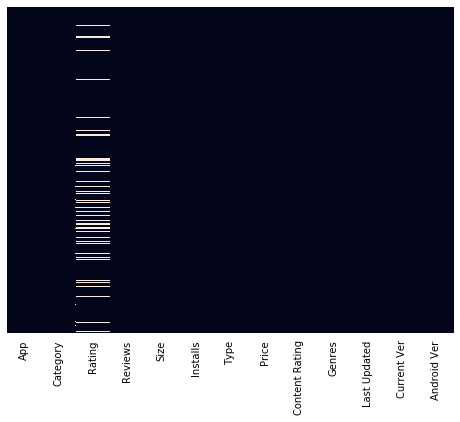

In [45]:
fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(data.isnull(),cbar= False,ax=ax)
ax.set_yticks([])
ax.tick_params(bottom='')

In [46]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

All object dtypes with missing values will be filled with the most occuring entry in their column (mode).


Rating , a float dtype will be filled with the mean of Rating column for the gerne each missing value belong to.


In [47]:
missing_obj_dype_cols = ['Type','Content Rating','Current Ver','Android Ver']

for i in missing_obj_dype_cols:
    mode = stat.mode(data[i])
    data[i] = data[i].fillna(mode)

In [48]:
avg_per_gerne = round(data.groupby('Genres').mean(), 1)
fill_to = avg_per_gerne.to_dict()['Rating']
data.Rating.index = data.Genres.values
data['Rating'] = pd.Series(data['Rating'].fillna(fill_to).values)

In [49]:
data.isnull().sum()

App               0
Category          0
Rating            5
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

What's with these redundant five nans 😓?!
Let's have a look .


In [50]:
redundant = data[data.Rating.isnull()]
redundant

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
2111,Mcqueen Coloring pages,FAMILY,NaN,65,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
6829,Bu Hangi Firma?,FAMILY,NaN,8,26M,100+,Free,0,Everyone,Trivia;Education,"December 10, 2017",3.3.6z,4.0.3 and up
7629,Wuwu & Co.,FAMILY,NaN,9,77M,100+,Paid,$2.99,Everyone,Books & Reference;Creativity,"March 22, 2017",2.49,4.1 and up
9672,Masha and the Bear - Hair Salon and MakeUp Games,FAMILY,NaN,1,83M,100+,Paid,$2.49,Everyone,Role Playing;Education,"March 5, 2018",1.0.1,4.1 and up


Their genres belong to either 'Art & Design;Action & Adventure', 'Trivia;Education', 'Books & Reference;Creativity' or 'Role
Playing;Education'.
> Let's check for the values these keys belong to in the 'fill_to' dictionary.


In [51]:
fill_to.values()

dict_values([4.3, 4.3, 4.2, 4.4, 4.6, 4.1, 4.3, 4.3, 4.5, 4.4, nan, 4.4, 3.9, 4.2, 4.3, 4.3, 4.0, 4.3, 4.8, 4.3, nan, 4.2, 4.1, 4.1, 4.3, 4.4, 4.3, 4.2, 4.3, 4.5, 4.3, 4.3, 4.1, 4.2, 4.1, 4.8, 4.2, 4.2, 4.0, 4.3, 4.3, 4.4, 4.3, 4.4, 4.2, 4.4, 3.9, 4.2, 4.2, 4.0, 4.2, 4.2, 4.1, 4.2, 4.3, 4.5, 4.4, 4.2, 4.0, 4.4, 19.0, 4.1, 4.2, 4.3, 3.9, 4.7, 4.2, 4.2, 4.1, 4.3, 4.0, 4.1, 4.2, 4.2, 4.3, 4.5, 4.1, 4.3, 3.8, 3.9, 4.3, 4.3, 4.2, 4.2, 4.4, 4.3, 4.4, 4.4, 4.6, 4.2, 4.3, 4.5, 4.3, 4.3, 4.3, nan, 4.0, 4.3, 4.2, 4.4, 4.4, 4.4, 4.3, 4.2, 4.4, 4.2, 4.6, 4.4, 4.5, 4.0, 4.5, 4.1, 4.1, 4.0, nan, 4.1, 4.1, 4.0, 4.2, 4.4])

In [52]:
fill_to['Trivia;Education']

nan

Smiles.The average value of these Genres was nan all along. <br>
These missing values were replaced with a missing value! Hence, the missing value turned redundant. <br>
There's nothing left to do than to drop these, or fill them with the overall mean 😏.


In [53]:
data['Rating'] = data['Rating'].fillna(data['Rating'].mean())

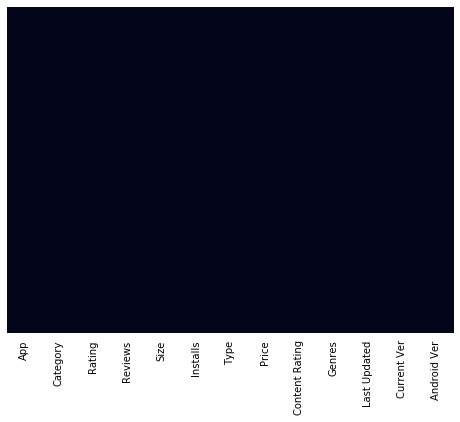

In [54]:
fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(data.isnull(),cbar=False, ax=ax)
ax.set_yticks([])
ax.tick_params(bottom='')

In [55]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# Cleaning Inconsistent Data Entries.


The dtypes of come columns would also be changed here.


In [56]:
data.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5289,Ak-47 Wallpapers 2018,PERSONALIZATION,4.3,7,4.9M,500+,Free,0,Everyone,Personalization,"March 14, 2018",newversion,4.3 and up
10283,Bank FD Interest Calculator,FINANCE,4.5,166,3.5M,"10,000+",Free,0,Everyone,Finance,"January 7, 2018",2.5,4.0.3 and up
7570,Ruler,TOOLS,4.5,27180,4.1M,"1,000,000+",Free,0,Everyone,Tools,"July 6, 2018",3.24,4.1 and up
9018,Swahili Radio,NEWS_AND_MAGAZINES,4.5,171,4.8M,"10,000+",Free,0,Everyone,News & Magazines,"May 30, 2018",3.0,4.0 and up
5579,Sleep as Android Gear Addon,HEALTH_AND_FITNESS,2.8,961,1.3M,"100,000+",Free,0,Everyone,Health & Fitness,"February 27, 2018",1.5,4.0 and up
2791,Newegg Mobile,SHOPPING,4.5,35497,16M,"1,000,000+",Free,0,Everyone,Shopping,"July 11, 2018",4.16.0,4.4 and up
9816,File Manager by Xiaomi: release file storage s...,TOOLS,4.8,337532,15M,"10,000,000+",Free,0,Everyone,Tools,"July 11, 2018",V1-180703,4.4 and up
1349,My Cycles Period and Ovulation,HEALTH_AND_FITNESS,4.3,26652,41M,"1,000,000+",Free,0,Everyone,Health & Fitness,"May 4, 2018",2.3.3,4.0.3 and up
5973,Baby Connect (activity log),PARENTING,4.7,8343,8.3M,"50,000+",Paid,$4.99,Everyone,Parenting,"July 10, 2018",6.3.16,4.0.3 and up
7202,ABAI CE Scanner,FAMILY,4.3,0,4.3M,"1,000+",Free,0,Everyone,Education,"January 23, 2018",1.3,4.1 and up


App : Seems normal. Anyone could name their app anything.

Category : I'd love to remove these 'harmless' underscores. Besides, there could be meaningless or repeated categories. We'd check
for this too.

Rating : Perfectly filled 😍!

Reviews : Hmmm, I'm unsure it's perfect. We'd try converting them to integers to be sure. Having a ValueError means the column needs
cleaning.

Size : Nicely filled 😊. We'd still check to be sure.


Installs : Normal. We'd still check to be sure.


Type : Normal too. We'd still check to be sure.


Price : We'd remove the dollar sign, change its dtype to float and rename it.


Content Rating : I found something strange here. See below:

In [57]:
data.iloc[141:142]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
141,Download free book with green book,BOOKS_AND_REFERENCE,4.6,4478,9.5M,"100,000+",Free,0,Everyone 10+,Books & Reference,"July 31, 2017",1.1,4.0 and up


'Everyone 10+'

Downloading the game is restricted to those 10 or above. Why then, should Everyone be included? For all occurences similar to this, we'd
remove Everyone from there. We'd also check other values to be sure.


Genre : Seems normal. We'd check to be sure.


Last Updated : This would be converted to datetime.


Current Ver : Looks nice. We'd still check to be sure.


Android Ver : Very perfect, but we'd still check to be sure 😏.


In [58]:
data['Category']= data['Category'].str.replace('_','  ')

In [59]:
data['Category'].unique()

array(['ART  AND  DESIGN', 'AUTO  AND  VEHICLES', 'BEAUTY',
       'BOOKS  AND  REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD  AND  DRINK', 'HEALTH  AND  FITNESS', 'HOUSE  AND  HOME',
       'LIBRARIES  AND  DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS',
       'TRAVEL  AND  LOCAL', 'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY',
       'PARENTING', 'WEATHER', 'VIDEO  PLAYERS', 'NEWS  AND  MAGAZINES',
       'MAPS  AND  NAVIGATION', '1.9'], dtype=object)

The last element in the output above seems off. <br>
Let's peep at the whole data of rows with their category being '1.9'.

In [60]:
data[data['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


__Wow!__ <br>
__1. Its categoty is numerical.__ <br>
__2. Its rating is above 5.__ <br>
__3. Last Updated is a datetype, but its has a perplexing entry itself.__ <br>
__4. Its gerne is 'February 11, 2018' - an odd value.__ <br>
__5. Its type is odd as well.__ <br>
__6. While most of the entries in Reviews are integers, this one chose to be 3.0M.__



**I better drop this entire row, or what do you think 😏?**

In [61]:
data = data.drop(10472)

In [62]:
#Reviews

data['Reviews'] = data['Reviews'].astype('int')

In [63]:
#Size

data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

As expected, everything seems alright.


In [64]:
#Installs

data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

As expected, everything seems alright.

In [65]:
# Type
data['Type'].unique()

array(['Free', 'Paid'], dtype=object)

Nice.

In [66]:
#Price
data['Price'] = data['Price'].str.replace('$', '')
data['Price'] = data['Price'].astype('float')

Nice

In [67]:
#Content Rating
absurd =data[data['Content Rating'].str.contains('Everyone ')]
absurd

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
22,Superheroes Wallpapers | 4K Backgrounds,ART AND DESIGN,4.7,7699,4.2M,"500,000+",Free,0.0,Everyone 10+,Art & Design,"July 12, 2018",2.2.6.2,4.0.3 and up
77,Police Detector (Speed Camera Radar),AUTO AND VEHICLES,4.3,3574,3.9M,"1,000,000+",Free,0.0,Everyone 10+,Auto & Vehicles,"July 4, 2018",1.6,4.0 and up
113,Wrinkles and rejuvenation,BEAUTY,4.3,182,5.7M,"100,000+",Free,0.0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
130,Recipes and tips for losing weight,BEAUTY,4.3,35,3.1M,"10,000+",Free,0.0,Everyone 10+,Beauty,"December 11, 2017",2.0,3.0 and up
141,Download free book with green book,BOOKS AND REFERENCE,4.6,4478,9.5M,"100,000+",Free,0.0,Everyone 10+,Books & Reference,"July 31, 2017",1.1,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10419,Fast Motorcycle Driver 2016,GAME,4.2,28151,49M,"1,000,000+",Free,0.0,Everyone 10+,Racing,"December 25, 2016",1.2,2.3.3 and up
10639,Florida Today,NEWS AND MAGAZINES,3.3,202,38M,"10,000+",Free,0.0,Everyone 10+,News & Magazines,"June 20, 2018",5.9.5,5.0 and up
10779,Fortune Quest: Savior,FAMILY,3.6,135,75M,"10,000+",Free,0.0,Everyone 10+,Role Playing,"June 1, 2018",1.022,4.4 and up
10784,Big Hunter,GAME,4.3,245455,84M,"10,000,000+",Free,0.0,Everyone 10+,Action,"May 31, 2018",2.8.6,4.0 and up


In [68]:
absurd['Content Rating'].unique()

array(['Everyone 10+'], dtype=object)

WOW! <br>
More than 400 rows are 'absurd'

In [69]:
data['Content Rating'] = data['Content Rating'].str.replace('Everyone 10','10')

data['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
10+                 414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

Oh, wow, 'Unrated' should also fall under 'Everyone', don't you think?


In [70]:
data['Content Rating'] = data['Content Rating'].str.replace('Unrated', 'Everyone')

data['Content Rating'].value_counts()

Everyone           8716
Teen               1208
Mature 17+          499
10+                 414
Adults only 18+       3
Name: Content Rating, dtype: int64

In [71]:
# Genres
data['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

Seems so dirty 😒. <br>
Let's have a closer peep.


In [72]:
data['Content Rating'] = data['Content Rating'].str.replace('Unrated', 'Everyone')
data['Content Rating'].value_counts()


Everyone           8716
Teen               1208
Mature 17+          499
10+                 414
Adults only 18+       3
Name: Content Rating, dtype: int64

In [73]:
data['Genres'].value_counts()[:20]

Tools                842
Entertainment        623
Education            549
Medical              463
Business             460
Productivity         424
Sports               398
Personalization      392
Communication        387
Lifestyle            381
Finance              366
Action               365
Health & Fitness     341
Photography          335
Social               295
News & Magazines     283
Shopping             260
Travel & Local       257
Dating               234
Books & Reference    231
Name: Genres, dtype: int64

Of 117 unique values, the first 20 seem ideal

In [74]:
data['Genres'].value_counts()[20:40]

Arcade                     220
Simulation                 200
Casual                     193
Video Players & Editors    173
Puzzle                     140
Maps & Navigation          137
Food & Drink               127
Role Playing               109
Strategy                   107
Racing                      98
House & Home                88
Libraries & Demo            85
Auto & Vehicles             85
Weather                     82
Adventure                   75
Events                      64
Comics                      59
Art & Design                58
Beauty                      53
Education;Education         50
Name: Genres, dtype: int64

In [75]:
data['Genres'].value_counts()[40:60]

Card                           48
Parenting                      46
Board                          44
Educational;Education          41
Casino                         39
Trivia                         38
Educational                    37
Casual;Pretend Play            31
Word                           29
Entertainment;Music & Video    27
Education;Pretend Play         23
Music                          22
Casual;Action & Adventure      21
Racing;Action & Adventure      20
Puzzle;Brain Games             19
Educational;Pretend Play       19
Action;Action & Adventure      17
Arcade;Action & Adventure      16
Board;Brain Games              15
Casual;Brain Games             13
Name: Genres, dtype: int64

Up till music, everything seems perfect. 'Puzzle;Brain Games' should not be a separate gerne, but should be merged with 'Puzzle'. The same goes for the rest, downwards.

In [76]:
data['Genres'].value_counts()[60:]

Adventure;Action & Adventure             13
Simulation;Action & Adventure            11
Entertainment;Brain Games                 8
Art & Design;Creativity                   7
Education;Creativity                      7
Casual;Creativity                         7
Role Playing;Action & Adventure           7
Parenting;Education                       7
Educational;Brain Games                   6
Education;Action & Adventure              6
Parenting;Music & Video                   6
Education;Brain Games                     5
Educational;Creativity                    5
Puzzle;Action & Adventure                 5
Role Playing;Pretend Play                 5
Education;Music & Video                   5
Educational;Action & Adventure            4
Simulation;Pretend Play                   4
Sports;Action & Adventure                 4
Entertainment;Creativity                  3
Video Players & Editors;Music & Video     3
Simulation;Education                      3
Music;Music & Video             

In [77]:
data['Genres'] = data['Genres'].str.replace(r';[a-z &]*','',flags=re.I)

In [78]:
data['Genres'].value_counts()

Tools                      843
Entertainment              667
Education                  645
Medical                    463
Business                   460
Productivity               424
Sports                     402
Personalization            392
Communication              388
Lifestyle                  383
Action                     382
Finance                    366
Health & Fitness           343
Photography                335
Social                     295
News & Magazines           283
Casual                     270
Shopping                   260
Travel & Local             258
Arcade                     237
Books & Reference          234
Dating                     234
Simulation                 218
Video Players & Editors    178
Puzzle                     167
Maps & Navigation          137
Food & Drink               127
Role Playing               123
Racing                     119
Educational                112
Strategy                   111
Adventure                   91
House & 

Educational should be merged with Education  <br>
Music & Audio should be merged with Music.


In [82]:
data['Genres'] = data['Genres'].str.replace('Educational','Education').str.replace('Music & Audio','Music')

data['Genres'].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing',
       'Video Players & Editors', 'Medical', 'Social', 'Shopping',
       'Photography', 'Travel & Local', 'Tools', 'Personalization',
       'Productivity', 'Parenting', 'Weather', 'News & Magazines',
       'Maps & Navigation', 'Casino'], dtype=object)

Nice

In [84]:
#Last Updated

data['Last Updated'] = pd.to_datetime(data['Last Updated'])

There is an inconsistent data entry here. We'd deal with that later for some reason.


In [100]:
#Current Ver

data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [101]:
data['Android Ver'] =data['Android Ver'].str.replace('W','')

In [103]:
data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '7.1 and up', '7.0 - 7.1.1', '8.0 and up',
       '5.0 - 8.0', '3.1 and up', '2.0.1 and up', '4.1 - 7.1.1',
       '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1', '5.0 - 7.1.1'],
      dtype=object)

__ALL DONE__

Removing outliers, if any    <br>

remember that outliers can only be seen in number.

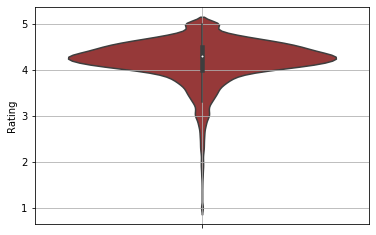

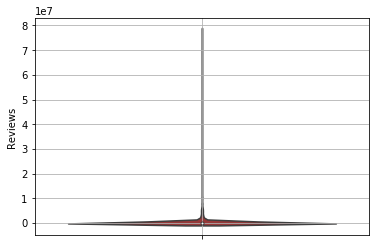

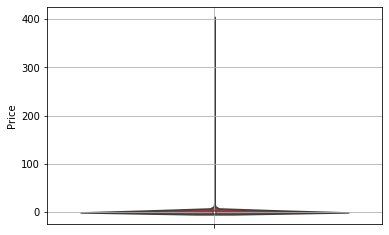

In [111]:
for i in data.select_dtypes(['int','float']):
    sns.violinplot(y= data[i] ,color='brown')
    plt.grid()
    plt.show()
    

They all seems to be without 'outliers' since they are all within resonable ranges.


Further Data Cleaning.   <br>

App is expected to be unique throughout, but it isn't. We'd deal with that here.

In [114]:
# Before dropping
Apps = data['App'].value_counts()
Apps[Apps>1]

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
                                                    ..
Transenger – Ts Dating and Chat for Free             2
Random Video Chat                                    2
Clover Dating App                                    2
Docs To Go™ Free Office Suite                        2
English Dictionary - Offline                         2
Name: App, Length: 798, dtype: int64

Wow there are almost 800 apps repeated.  <br>
Let's check a few of them.


In [121]:
data[data['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0.0,10+,Adventure,2018-07-31,2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0.0,10+,Adventure,2018-07-31,2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0.0,10+,Adventure,2018-07-31,2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0.0,10+,Adventure,2018-07-31,2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0.0,10+,Adventure,2018-07-31,2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0.0,10+,Adventure,2018-07-31,2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0.0,10+,Adventure,2018-07-31,2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0.0,10+,Adventure,2018-07-31,2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0.0,10+,Adventure,2018-07-31,2.347.225742,4.1 and up


This is definitely a duplicate!

In [122]:
data[data.App=='ESPN']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2959,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0.0,10+,Sports,2018-07-19,Varies with device,5.0 and up
3010,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0.0,10+,Sports,2018-07-19,Varies with device,5.0 and up
3018,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0.0,10+,Sports,2018-07-19,Varies with device,5.0 and up
3048,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0.0,10+,Sports,2018-07-19,Varies with device,5.0 and up
3060,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0.0,10+,Sports,2018-07-19,Varies with device,5.0 and up
3072,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0.0,10+,Sports,2018-07-19,Varies with device,5.0 and up
4069,ESPN,SPORTS,4.2,521081,Varies with device,"10,000,000+",Free,0.0,10+,Sports,2018-07-19,Varies with device,5.0 and up


In [123]:
data[data.App == 'Clover Dating App']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
495,Clover Dating App,DATING,4.1,11633,23M,"500,000+",Free,0.0,Mature 17+,Dating,2018-07-24,2.5.1,4.1 and up
550,Clover Dating App,DATING,4.1,11633,23M,"500,000+",Free,0.0,Mature 17+,Dating,2018-07-24,2.5.1,4.1 and up


It would not be too much if an assumption to say that those 798 apps were duplicated when gathering the data. <br>
I'd, therefore, be dropping duplicates.


In [125]:
# Before dropping
data.shape


(10840, 13)

In [126]:
duplicate = data[data.App.duplicated()]
duplicate

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0.0,Everyone,Shopping,2018-07-30,3.9,4.4 and up


In [127]:
data = data.drop(duplicate.index)

In [128]:
# After dropping
data.shape

(9659, 13)

In [129]:
# After dropping
data.shape

(9659, 13)

In [130]:
# After dropping
Apps = data['App'].value_counts()
Apps[Apps>1]


Series([], Name: App, dtype: int64)

__Data Cleaned.__  <br>
I'd go ahead and save the cleaned version of it.


In [131]:
data.to_csv('CLEANED Playstore App Dataset.csv')

# Section 2: Exploratory Data Analysis.


Google Play Store has a whole lot of category. I'm curious to know which category most of the apps there fall to.


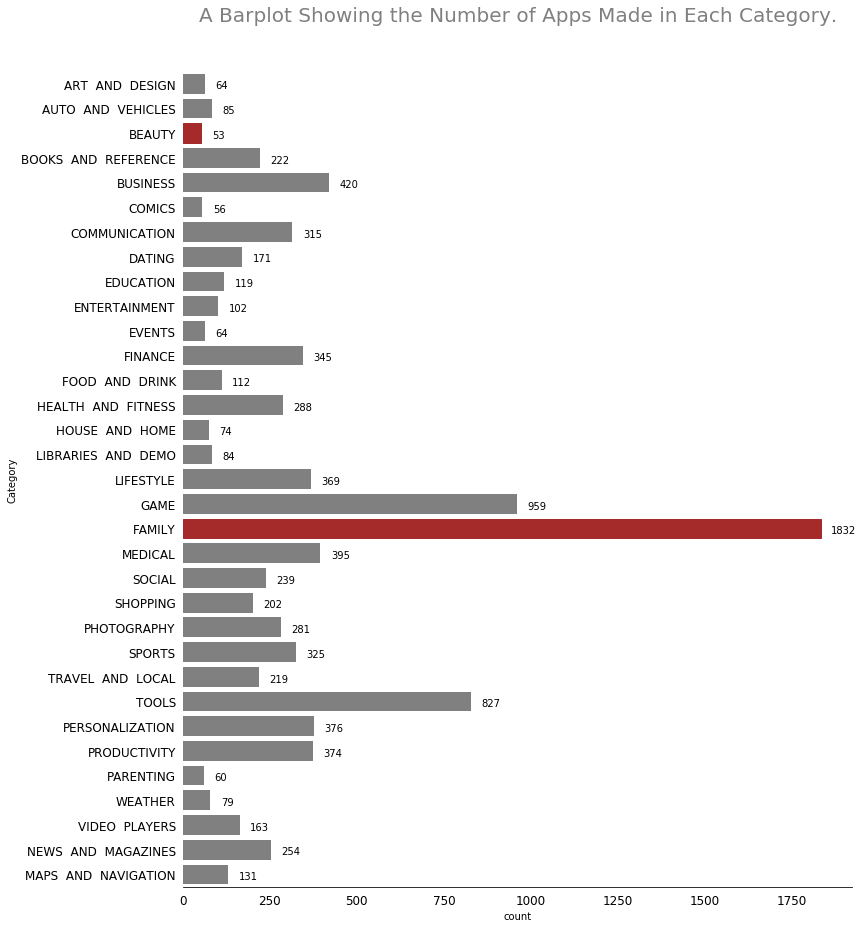

In [164]:
fig, ax = plt.subplots(figsize=(12,15))
plot =sns.countplot(y=data['Category'],ax=ax,color='grey')
for i in plot.patches:
    plot.annotate(i.get_width(),(i.get_width()+30,i.get_y()+0.6))
    if i.get_width()==data['Category'].value_counts().max():
     i.set_color('brown')
    if i.get_width()==data['Category'].value_counts().min():
     i.set_color('brown')
for i in ['left','right','top']:
    ax.spines[i].set_visible(False)
ax.tick_params(bottom=False, left ="", labelsize='large')
plt.title('A Barplot Showing the Number of Apps Made in Each Category.\n\n',fontsize = 20, color = 'grey');

Family! <br>
Most of the Google Play Store Apps are of the Family category, while the least is Comics.

Of the Family Category, which genre (sub-category) is the most famous?

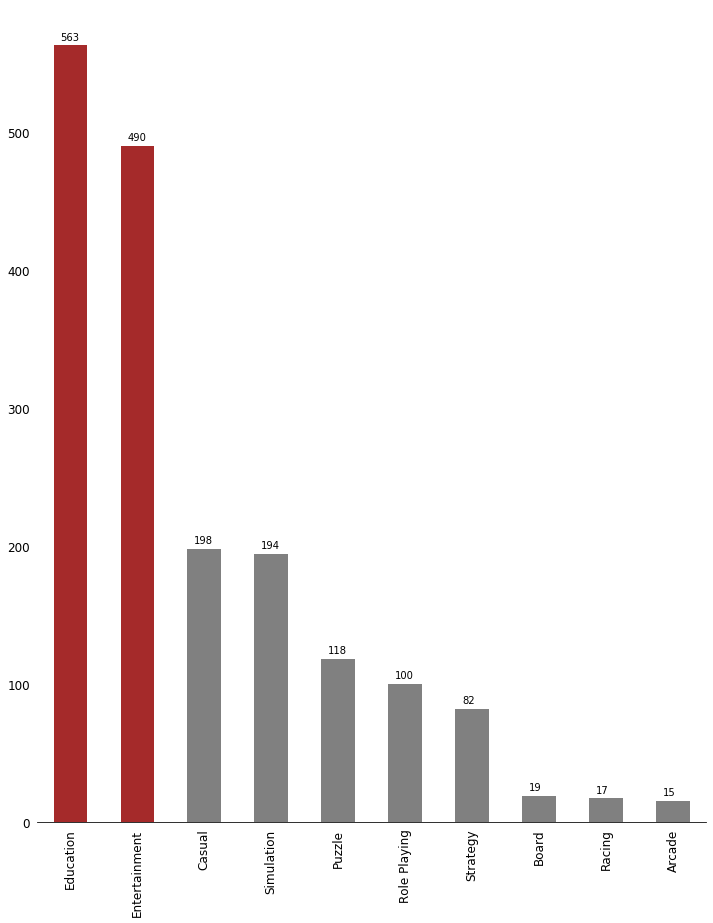

In [187]:
fig, ax = plt.subplots(figsize=(12,15))
Family_genre = data['Genres'][data['Category']=='FAMILY']
plott = Family_genre.value_counts()[:10].plot.bar(color=['brown','brown','grey','grey','grey','grey','grey','grey','grey','grey'])

for i in plott.patches:
    plott.annotate(i.get_height(),(i.get_x()+0.1,i.get_height()+4))
for i in ['left','top','right']:
    ax.spines[i].set_visible(False)
ax.tick_params(bottom=False,left=False,labelsize='large')

"Around the world today, a larger fraction of developers are developing apps in the Family Category to majorly educate or <br>
entertain them." - Our data just revealed this to us! 

Do they sell most of their apps or place them for free?

Text(0.5, 1.0, 'A Barplot Showing the Proportion of the Type of Apps Made in the FAMILY Category.\n\n')

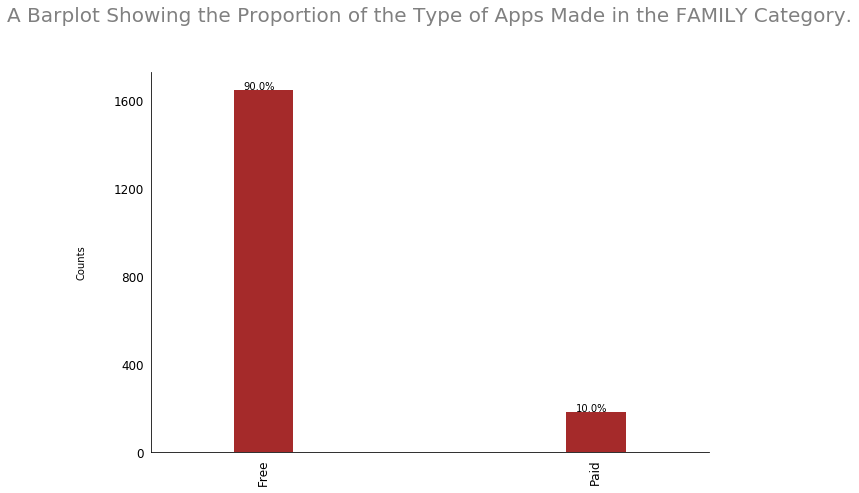

In [217]:
fig,ax = plt.subplots(figsize=(10,7))
Family_Type = data['Type'][data['Category']=='FAMILY']
plottt = Family_Type.value_counts().plot.bar(color='brown',width= .18)
for i in plottt.patches:
    plottt.annotate('{}%'.format(round(i.get_height()/len(Family_Type)*100)),(i.get_x()+0.03,i.get_height()+3))
for i in ['top','right']:
    ax.spines[i].set_visible(False)
plt.ylabel('Counts\n\n') 
plt.yticks([0,400,800,1200,1600])
ax.tick_params(bottom=False,left=False,labelsize='larger')
plt.title('A Barplot Showing the Proportion of the Type of Apps Made in the FAMILY Category.\n\n',fontsize=20,color='grey')

A whole lot of the apps made under this 'popular' category are free! Infact, most apps from our data are free to download.


Do they get a high rating for their apps, compared to other categories?

In [218]:
Family_Rating = data['Rating'].groupby(data['Category']).mean().sort_values(ascending = False)
Family_Rating

Category
EVENTS                   4.425000
EDUCATION                4.363866
ART  AND  DESIGN         4.356106
BOOKS  AND  REFERENCE    4.334234
PERSONALIZATION          4.325532
BEAUTY                   4.283019
PARENTING                4.273333
SOCIAL                   4.255230
HEALTH  AND  FITNESS     4.251736
GAME                     4.245464
WEATHER                  4.239241
SHOPPING                 4.237624
SPORTS                   4.212923
AUTO  AND  VEHICLES      4.191765
PRODUCTIVITY             4.186631
LIBRARIES  AND  DEMO     4.183333
FAMILY                   4.183173
COMICS                   4.178571
FOOD  AND  DRINK         4.176786
MEDICAL                  4.175443
PHOTOGRAPHY              4.160142
HOUSE  AND  HOME         4.158108
COMMUNICATION            4.136190
ENTERTAINMENT            4.135294
NEWS  AND  MAGAZINES     4.117323
FINANCE                  4.113623
BUSINESS                 4.099048
LIFESTYLE                4.094580
TRAVEL  AND  LOCAL       4.073973
VIDEO

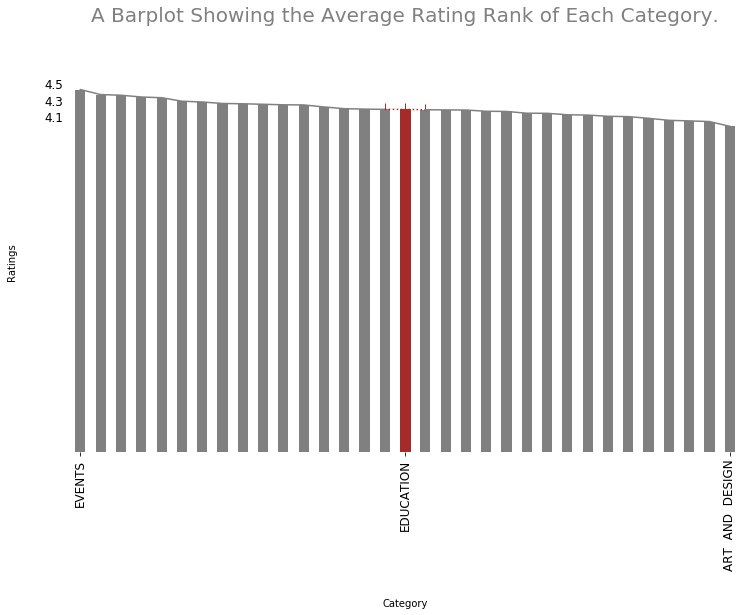

In [221]:
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(Family_Rating[:16], color = 'grey',)
ax.plot(Family_Rating[15:18], color = 'brown', alpha = 1, marker = 2, ls = ':')
ax.plot(Family_Rating[17:], color = 'grey')
plot = Family_Rating.plot.bar(color='grey')
for i in plot.patches:
 if i.get_height()==Family_Rating[16]:
     i.set_color('brown')

for i in ['top','right','left', 'bottom']:
 ax.spines[i].set_visible(False)
ax.tick_params(left = False, labelsize = 'large')
plt.xticks(['EVENTS','FAMILY','DATING'], rotation=0)
plt.xlabel('\n\nCategory')
plt.ylabel('Ratings\n\n')
plt.title('A Barplot Showing the Average Rating Rank of Each Category.\n\n',fontsize = 20, color = 'grey')
plt.yticks([4.1,4.3,4.5]);


Though the FAMILY Category has the highest number of apps, it has no important Rating rank among other categories. <br>
EVENTS and DATING have the highest and lowest ranks, respectively.


__Still on the FAMILY Category:__ <br>
What is the minimum number of Installs they get? What's the maximum? What's the avarage, with respect to the other categories?

In [223]:
data['Installs'].groupby(data['Category']).min().sort_values(ascending=False)

Category
ENTERTAINMENT            1,000,000+
WEATHER                      1,000+
BEAUTY                       1,000+
VIDEO  PLAYERS               1,000+
COMICS                       1,000+
SHOPPING                     1,000+
EDUCATION                    1,000+
PHOTOGRAPHY                  1,000+
PARENTING                    1,000+
MAPS  AND  NAVIGATION        1,000+
LIBRARIES  AND  DEMO         1,000+
HEALTH  AND  FITNESS             1+
TOOLS                            1+
SPORTS                           1+
AUTO  AND  VEHICLES              1+
HOUSE  AND  HOME                 1+
GAME                             1+
FOOD  AND  DRINK                 1+
BOOKS  AND  REFERENCE            1+
COMMUNICATION                    1+
DATING                           1+
EVENTS                           1+
PERSONALIZATION                  0+
NEWS  AND  MAGAZINES             0+
PRODUCTIVITY                     0+
MEDICAL                          0+
SOCIAL                           0+
FINANCE            

The FAMILY Category ranks the lowest in both Series. Its maximum Installs value is so low! What's more shocking? There is even an
app with zero installs and this is found in the FAMILY Category! I'd like to download that app, though 😂.


In [224]:
 data[data['Installs']=='0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.2,0,Varies with device,0,Free,0.0,10+,Strategy,2018-06-28,Varies with device,Varies with device


Which apps in the Google Play Store are famous? Apps with the highest installs would reveal this to us. 


Under which category do most of them fall?


In [225]:
famous_apps = data[data.Installs==data.Installs.max()]
famous_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
342,Viber Messenger,COMMUNICATION,4.3,11334799,Varies with device,"500,000,000+",Free,0.0,Everyone,Communication,2018-07-18,Varies with device,Varies with device
347,imo free video calls and chat,COMMUNICATION,4.3,4785892,11M,"500,000,000+",Free,0.0,Everyone,Communication,2018-06-08,9.8.000000010501,4.0 and up
371,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,Varies with device,"500,000,000+",Free,0.0,Everyone,Communication,2018-07-31,37.1.206017801.DR37_RC14,4.4 and up
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40M,"500,000,000+",Free,0.0,Teen,Communication,2018-08-02,12.8.5.1121,4.0 and up
403,LINE: Free Calls & Messages,COMMUNICATION,4.2,10790289,Varies with device,"500,000,000+",Free,0.0,Everyone,Communication,2018-07-26,Varies with device,Varies with device
1655,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up
1661,Temple Run 2,GAME,4.3,8118609,62M,"500,000,000+",Free,0.0,Everyone,Action,2018-07-05,1.49.1,4.0 and up
1662,Pou,GAME,4.3,10485308,24M,"500,000,000+",Free,0.0,Everyone,Casual,2018-05-25,1.4.77,4.0 and up
1722,My Talking Tom,GAME,4.5,14891223,Varies with device,"500,000,000+",Free,0.0,Everyone,Casual,2018-07-19,4.8.0.132,4.1 and up
2546,Facebook Lite,SOCIAL,4.3,8606259,Varies with device,"500,000,000+",Free,0.0,Teen,Social,2018-08-01,Varies with device,Varies with device


__As expected, they are all free to download, and most of them do not limit any age group from downloading them.__

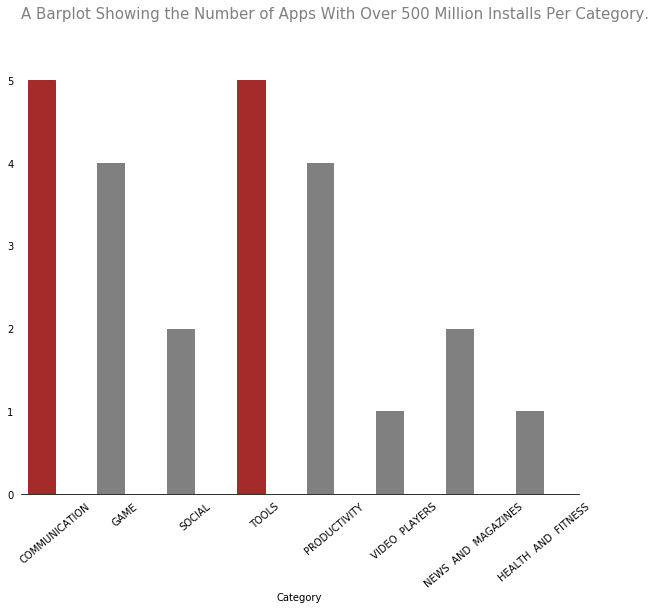

In [227]:
fig, ax = plt.subplots(figsize = (10,8))
plot = sns.countplot(famous_apps['Category'], color = 'grey')
for i in plot.patches:
 i.set_width(0.4)
 if i.get_height()==famous_apps['Category'].value_counts().max():
     i.set_color('brown')
for i in ['left', 'right', 'top']:
 ax.spines[i].set_visible(False)
ax.tick_params(bottom = False, left = False)
plt.xticks(rotation = 40)
plt.ylabel('')
plt.title('A Barplot Showing the Number of Apps With Over 500 Million Installs Per Category.\n\n',
 fontsize = 15, color = 'grey', loc = 'left');

A whole lot of people have downloaded more apps in the COMMUNICATION and TOOLS Categories, than any other Category. <br>
W'd look deeper into the apps under these 'famous' Categories. 

In [234]:
famous_apps[(famous_apps['Category']=='COMMUNICATION') | (famous_apps['Category']=='TOOLS')]['App'].values

array(['Viber Messenger', 'imo free video calls and chat',
       'Google Duo - High Quality Video Calls',
       'UC Browser - Fast Download Private & Secure',
       'LINE: Free Calls & Messages', 'Google Translate',
       'SHAREit - Transfer & Share', 'Gboard - the Google Keyboard',
       'Clean Master- Space Cleaner & Antivirus',
       'Security Master - Antivirus, VPN, AppLock, Booster'], dtype=object)

__These are popular apps indeed.__

Which app(s) in the Google Play Store are the least famous?

In [235]:
infamous_apps = data[data.Installs==data.Installs.min()]
infamous_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.2,0,Varies with device,0,Free,0.0,10+,Strategy,2018-06-28,Varies with device,Varies with device


Though it is free to download, it still has no downloads.


__About how many years does this data span about? When is the latest date?__

In [236]:
data['Last Updated'].min(), data['Last Updated'].max()

(Timestamp('2010-05-21 00:00:00'), Timestamp('2018-08-08 00:00:00'))

__Last Updated spans for about eight years, from the 21st of May 2010, to the 8th of August, 2018.__


__No app was updated beyond this range.__  <br>
The highest number of updates took place in what year?

Text(0.0, 1.0, 'Distribution of Apps Over Last Updated Years.\n\n\n')

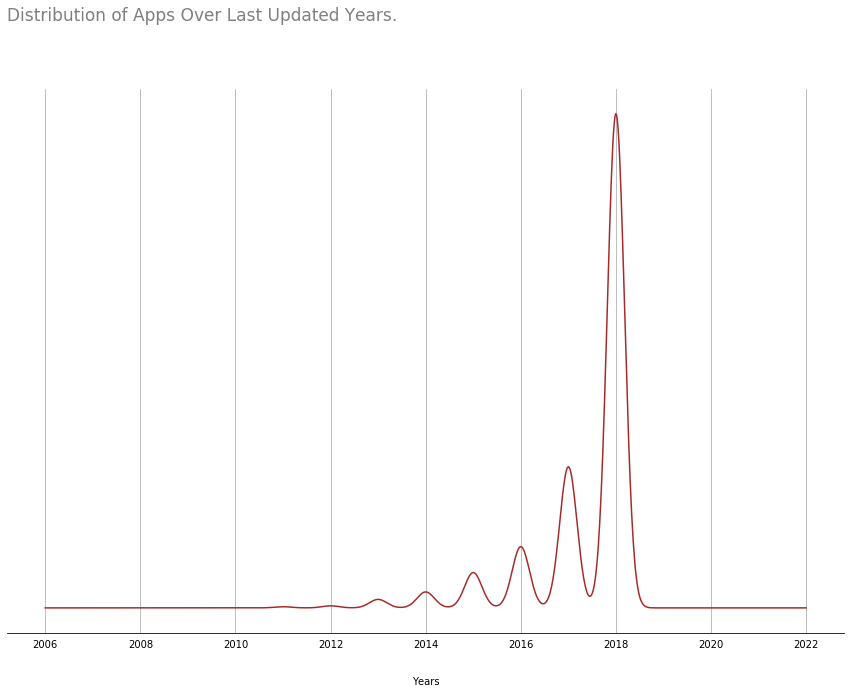

In [237]:
fig, ax = plt.subplots(figsize = (15,10))
data['Last Updated'].dt.year.plot(kind='kde', color = 'brown')
for i in ['left', 'right', 'top']:
 ax.spines[i].set_visible(False)
ax.tick_params(bottom = False, left = False, labelleft = '')
#plt.xlim([2010,2018])
plt.ylabel('')
plt.xlabel('\n\nYears')
plt.grid(axis = 'x')
plt.title('Distribution of Apps Over Last Updated Years.\n\n\n', loc = 'left', color = 'grey', fontsize = 17)

0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
10836    2017
10837    2018
10838    2017
10839    2015
10840    2018
Name: Last Updated, Length: 9659, dtype: int64